In [2]:

import numpy as np
import pandas as pd 
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('traderclassifier.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,day,user_address,base_cumulative_return,portfolio_return,daily_sharpe_ratio,trader_class,number_of_trades,unique_tokens_traded
0,2024-07-03 00:00:00.000,0x09dc02dfb7de2b150fe9a2d2ab92cf5767d423f9,-0.952872,19.799528,1.300633,Bad Trader,36.0,6.0
1,2024-09-02 00:00:00.000,0x2eb6ffcfc1591349a1983aad3e80d8fb3cec1df2,9.443217,1049.012213,3.530742,Good Trader,9.0,4.0
2,2024-06-21 00:00:00.000,0x580e4ce9d324426e8e5e2a33298a1d2fd73273a7,27.605549,2862.153698,2.276145,Good Trader,NaN,NaN
3,2024-04-08 00:00:00.000,0x448166a91e7bc50d0ac720c2fbed29e0963f5af8,0.007613,100.516119,29.420332,Average Trader,380.0,20.0
4,2024-08-10 00:00:00.000,0xb8ca7f877391032d9da4c995d64cdab3ecd03efd,-0.415733,57.618324,2.212055,Bad Trader,NaN,NaN
...,...,...,...,...,...,...,...,...
18194,2024-11-16 00:00:00.000,0x2b3ab8236a159434ce967d208c821ce1aec8ee56,22.107890,2307.759258,0.960698,NaN,NaN,NaN
18195,2024-06-07 00:00:00.000,0xadb4baa4bf3a1c176c4399402395403632b036a3,0.187292,120.244632,17.270114,Good Trader,NaN,NaN
18196,2024-11-14 00:00:00.000,0x08b505dc1603af317f8ffbf5db6359f0975d96ce,-0.527658,47.244034,0.195960,Bad Trader,NaN,NaN
18197,2024-07-16 00:00:00.000,0xa38ac89a9eceb2e00b5b05568f36815f6d9286dc,0.013748,109.311772,11.631746,Average Trader,NaN,NaN


In [4]:
# Convert 'day' column to datetime format and remove time component 
df['day'] = pd.to_datetime(df['day'], errors='coerce').dt.date
#Remove later
print(df.head())

          day                                user_address  \
0  2024-07-03  0x09dc02dfb7de2b150fe9a2d2ab92cf5767d423f9   
1  2024-09-02  0x2eb6ffcfc1591349a1983aad3e80d8fb3cec1df2   
2  2024-06-21  0x580e4ce9d324426e8e5e2a33298a1d2fd73273a7   
3  2024-04-08  0x448166a91e7bc50d0ac720c2fbed29e0963f5af8   
4  2024-08-10  0xb8ca7f877391032d9da4c995d64cdab3ecd03efd   

   base_cumulative_return  portfolio_return  daily_sharpe_ratio  \
0               -0.952872         19.799528            1.300633   
1                9.443217       1049.012213            3.530742   
2               27.605549       2862.153698            2.276145   
3                0.007613        100.516119           29.420332   
4               -0.415733         57.618324            2.212055   

     trader_class  number_of_trades  unique_tokens_traded  
0      Bad Trader              36.0                   6.0  
1     Good Trader               9.0                   4.0  
2     Good Trader               NaN               

In [5]:
# Define a function to detect outliers based on IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

#Find outliers for 'portfolio_return'
outliers = find_outliers_iqr(df, 'portfolio_return')
print(outliers)


              day                                user_address  \
1      2024-09-02  0x2eb6ffcfc1591349a1983aad3e80d8fb3cec1df2   
2      2024-06-21  0x580e4ce9d324426e8e5e2a33298a1d2fd73273a7   
21     2024-04-01  0xd0640fcb1ef5ac385b57701c5ef7030331c8d80b   
24     2024-09-03  0x6f5884a6ba14297eab47aa52c4e739f0a11ff7c1   
26     2024-09-13  0x2a45eaf79bbaff1a1d31fdd24ca67541d389ef78   
...           ...                                         ...   
18171  2024-06-29  0x1518c211f611114decd1842894e08b803afcd27b   
18175  2024-10-02  0xc8084f0227d4f857ec9d48c481abc040ec4a4f1f   
18185  2024-08-08  0x2b3ab8236a159434ce967d208c821ce1aec8ee56   
18189  2024-10-23  0xd0640fcb1ef5ac385b57701c5ef7030331c8d80b   
18194  2024-11-16  0x2b3ab8236a159434ce967d208c821ce1aec8ee56   

       base_cumulative_return  portfolio_return  daily_sharpe_ratio  \
1                9.443217e+00      1.049012e+03            3.530742   
2                2.760555e+01      2.862154e+03            2.276145   
21    

In [6]:
# Remove outliers from 'portfolio_return' column based on IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers from the 'portfolio_return' column
df_clean = remove_outliers_iqr(df, 'portfolio_return')

# Verify the result
print(df_clean)


              day                                user_address  \
0      2024-07-03  0x09dc02dfb7de2b150fe9a2d2ab92cf5767d423f9   
3      2024-04-08  0x448166a91e7bc50d0ac720c2fbed29e0963f5af8   
4      2024-08-10  0xb8ca7f877391032d9da4c995d64cdab3ecd03efd   
5      2024-11-18  0xc723bd563a44940a85e64aa221001d37f30418e4   
6      2024-10-09  0xc65236e35c1e0dc9e2044f6f38c9c3497e95ffa2   
...           ...                                         ...   
18192  2024-04-28  0x448166a91e7bc50d0ac720c2fbed29e0963f5af8   
18193  2024-06-10  0xda6d5943ae71272518636e24a1da83ad0e5a85dd   
18195  2024-06-07  0xadb4baa4bf3a1c176c4399402395403632b036a3   
18196  2024-11-14  0x08b505dc1603af317f8ffbf5db6359f0975d96ce   
18197  2024-07-16  0xa38ac89a9eceb2e00b5b05568f36815f6d9286dc   

       base_cumulative_return  portfolio_return  daily_sharpe_ratio  \
0                   -0.952872         19.799528            1.300633   
3                    0.007613        100.516119           29.420332   
4     

In [7]:
# Check for NaN values in the entire DataFrame
print(df_clean.isna().sum())

day                           0
user_address                  0
base_cumulative_return        0
portfolio_return              0
daily_sharpe_ratio            0
trader_class                  8
number_of_trades          10909
unique_tokens_traded      10909
dtype: int64


In [8]:
#drop rows in trader_class column with NaN values
df_cleann = df_clean.dropna(subset=['trader_class'])
print(df_cleann.isna().sum())

day                           0
user_address                  0
base_cumulative_return        0
portfolio_return              0
daily_sharpe_ratio            0
trader_class                  0
number_of_trades          10902
unique_tokens_traded      10902
dtype: int64


In [9]:
#Fill NaN with 0
df_cleaned = df_cleann.fillna(0)
print(df_cleaned.isna().sum())

day                       0
user_address              0
base_cumulative_return    0
portfolio_return          0
daily_sharpe_ratio        0
trader_class              0
number_of_trades          0
unique_tokens_traded      0
dtype: int64


In [10]:
df_cleaned.dtypes

day                        object
user_address               object
base_cumulative_return    float64
portfolio_return          float64
daily_sharpe_ratio        float64
trader_class               object
number_of_trades          float64
unique_tokens_traded      float64
dtype: object

In [11]:
#convert day to datetime
df_cleaned['day'] = pd.to_datetime(df_cleaned['day'])

In [12]:
df_cleaned.dtypes

day                       datetime64[ns]
user_address                      object
base_cumulative_return           float64
portfolio_return                 float64
daily_sharpe_ratio               float64
trader_class                      object
number_of_trades                 float64
unique_tokens_traded             float64
dtype: object

In [13]:
df_cleaned.trader_class.head()

0        Bad Trader
3    Average Trader
4        Bad Trader
5        Bad Trader
6        Bad Trader
Name: trader_class, dtype: object

In [14]:
df_cleaned

,day,user_address,base_cumulative_return,portfolio_return,daily_sharpe_ratio,trader_class,number_of_trades,unique_tokens_traded
0,2024-07-03,0x09dc02dfb7de2b150fe9a2d2ab92cf5767d423f9,-0.952872,19.799528,1.300633,Bad Trader,36.0,6.0
3,2024-04-08,0x448166a91e7bc50d0ac720c2fbed29e0963f5af8,0.007613,100.516119,29.420332,Average Trader,380.0,20.0
4,2024-08-10,0xb8ca7f877391032d9da4c995d64cdab3ecd03efd,-0.415733,57.618324,2.212055,Bad Trader,0.0,0.0
5,2024-11-18,0xc723bd563a44940a85e64aa221001d37f30418e4,-1.000000,-2.329274,-0.525633,Bad Trader,3.0,3.0
6,2024-10-09,0xc65236e35c1e0dc9e2044f6f38c9c3497e95ffa2,-0.213725,78.630133,6.771244,Bad Trader,0.0,0.0
...,...,...,...,...,...,...,...,...
18192,2024-04-28,0x448166a91e7bc50d0ac720c2fbed29e0963f5af8,-0.033730,96.381802,25.797064,Bad Trader,431.0,27.0
18193,2024-06-10,0xda6d5943ae71272518636e24a1da83ad0e5a85dd,0.084725,99.539738,28.155223,Bad Trader,0.0,0.0
18195,2024-06-07,0xadb4baa4bf3a1c176c4399402395403632b036a3,0.187292,120.244632,17.270114,Good Trader,0.0,0.0
18196,2024-11-14,0x08b505dc1603af317f8ffbf5db6359f0975d96ce,-0.527658,47.244034,0.195960,Bad Trader,0.0,0.0


In [15]:
# Convert 'trader_class' to a categorical column
df_cleaned["trader_class"] = df_cleaned["trader_class"].astype('category')
df_cleaned["trader_class"].cat.categories

Index(['Average Trader', 'Bad Trader', 'Good Trader'], dtype='object')

In [16]:
df_cleaned.dtypes

day                       datetime64[ns]
user_address                      object
base_cumulative_return           float64
portfolio_return                 float64
daily_sharpe_ratio               float64
trader_class                    category
number_of_trades                 float64
unique_tokens_traded             float64
dtype: object

In [17]:
# Assign unique integers to categories
df_cleaned['trader_class_numeric'] = df_cleaned['trader_class'].astype('category').cat.codes
df_cleaned['trader_class_numeric']

0        1
3        0
4        1
5        1
6        1
        ..
18192    1
18193    1
18195    2
18196    1
18197    0
Name: trader_class_numeric, Length: 14762, dtype: int8

In [18]:
df_cleaned.head()

,day,user_address,base_cumulative_return,portfolio_return,daily_sharpe_ratio,trader_class,number_of_trades,unique_tokens_traded,trader_class_numeric
0,2024-07-03,0x09dc02dfb7de2b150fe9a2d2ab92cf5767d423f9,-0.952872,19.799528,1.300633,Bad Trader,36.0,6.0,1
3,2024-04-08,0x448166a91e7bc50d0ac720c2fbed29e0963f5af8,0.007613,100.516119,29.420332,Average Trader,380.0,20.0,0
4,2024-08-10,0xb8ca7f877391032d9da4c995d64cdab3ecd03efd,-0.415733,57.618324,2.212055,Bad Trader,0.0,0.0,1
5,2024-11-18,0xc723bd563a44940a85e64aa221001d37f30418e4,-1.000000,-2.329274,-0.525633,Bad Trader,3.0,3.0,1
6,2024-10-09,0xc65236e35c1e0dc9e2044f6f38c9c3497e95ffa2,-0.213725,78.630133,6.771244,Bad Trader,0.0,0.0,1


In [19]:
# Select the first row (index 0) and convert it to a dictionary
# row_dict = df_cleaned.iloc[0].to_dict()

# print(row_dict)
# Select the first row of the DataFrame (you can change the index to select a different row)
# Choose the first row (index 0) and convert it to a dictionary
row_index = 0  # You can change this to pick another row
row_dict = df_cleaned.iloc[row_index].to_dict()

# Display the dictionary
print(row_dict)




{'day': Timestamp('2024-07-03 00:00:00'), 'user_address': '0x09dc02dfb7de2b150fe9a2d2ab92cf5767d423f9', 'base_cumulative_return': -0.952871878, 'portfolio_return': 19.799527694, 'daily_sharpe_ratio': 1.300632733, 'trader_class': 'Bad Trader', 'number_of_trades': 36.0, 'unique_tokens_traded': 6.0, 'trader_class_numeric': 1}


In [20]:
df_cleaned.columns

Index(['day', 'user_address', 'base_cumulative_return', 'portfolio_return',
       'daily_sharpe_ratio', 'trader_class', 'number_of_trades',
       'unique_tokens_traded', 'trader_class_numeric'],
      dtype='object')

# Correlation Coefficient Analysis

In [21]:
# Correlation Coefficient Analysis

df_cor = df_cleaned.corr(numeric_only=True)
print(df_cor['trader_class_numeric'].sort_values(ascending=False))



trader_class_numeric      1.000000
portfolio_return          0.271778
base_cumulative_return    0.238708
unique_tokens_traded     -0.025116
number_of_trades         -0.025140
daily_sharpe_ratio       -0.055742
Name: trader_class_numeric, dtype: float64


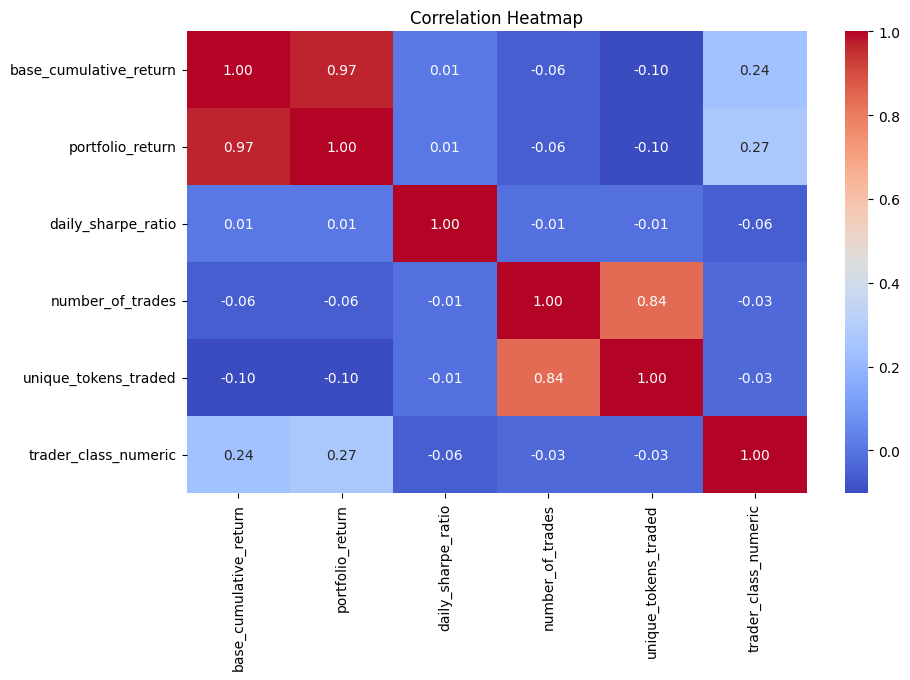

In [22]:
import seaborn as sns 

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Classifier Model

In [23]:
df_cleaned.dtypes

day                       datetime64[ns]
user_address                      object
base_cumulative_return           float64
portfolio_return                 float64
daily_sharpe_ratio               float64
trader_class                    category
number_of_trades                 float64
unique_tokens_traded             float64
trader_class_numeric                int8
dtype: object

In [24]:
numeric = df_cleaned.select_dtypes(include=['number']).drop(columns=['trader_class_numeric'], errors='ignore')
# Reset the index to ensure it is not included as a column
features = numeric.reset_index(drop=True)
features

,base_cumulative_return,portfolio_return,daily_sharpe_ratio,number_of_trades,unique_tokens_traded
0,-0.952872,19.799528,1.300633,36.0,6.0
1,0.007613,100.516119,29.420332,380.0,20.0
2,-0.415733,57.618324,2.212055,0.0,0.0
3,-1.000000,-2.329274,-0.525633,3.0,3.0
4,-0.213725,78.630133,6.771244,0.0,0.0
...,...,...,...,...,...
14757,-0.033730,96.381802,25.797064,431.0,27.0
14758,0.084725,99.539738,28.155223,0.0,0.0
14759,0.187292,120.244632,17.270114,0.0,0.0
14760,-0.527658,47.244034,0.195960,0.0,0.0


In [25]:
features = [col for col in features if col in df_cleaned.columns]
features

['base_cumulative_return',
 'portfolio_return',
 'daily_sharpe_ratio',
 'number_of_trades',
 'unique_tokens_traded']

In [26]:
print(type(features))  # Should be <class 'list'>


<class 'list'>


In [27]:
target = 'trader_class_numeric'

In [28]:
df_cleaned['portfolio_return'].describe()

count    14762.000000
mean        95.300985
std         39.273272
min         -2.588934
25%         75.324286
50%         99.954442
75%        114.412935
max        233.001848
Name: portfolio_return, dtype: float64

In [29]:
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score


In [30]:
#Data Processing
#Separating the features from the target variable.

X = df_cleaned[features]
y = df_cleaned[target]

In [31]:
#Normalize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data

In [32]:
#Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Train the Logistic Regression Model

In [33]:
#Train the logistic Regression Model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
model.fit(X_train, y_train)

/Users/olaoluwatunmise/miniconda3/envs/web3ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

# Predict on the test set

In [34]:
#predict on the test set
y_pred = model.predict(X_test)

# Evaluate the Model

##### Confusion Matrix

In [35]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 804    8    3]
 [  51 1462    0]
 [   1    0  624]]


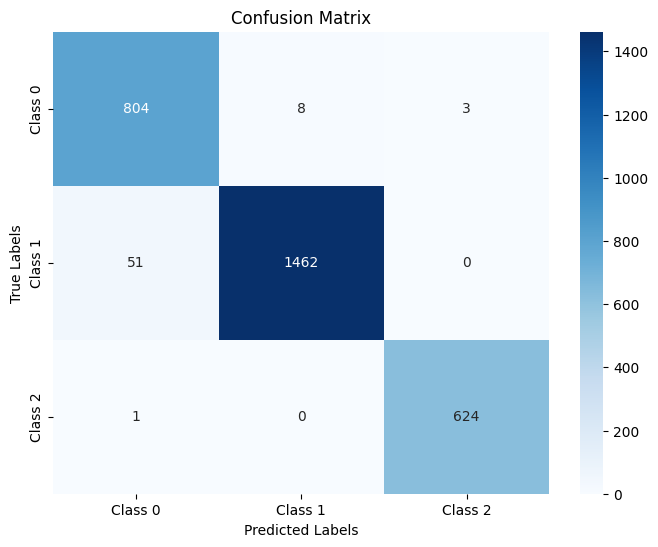

In [36]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Result: Correct predictions (True Positives for each class).

#### Classification Report

In [37]:
report = classification_report(y_test, y_pred,output_dict=True)
print("Classification Report:")
print(report)

Classification Report:
{'0': {'precision': 0.9392523364485982, 'recall': 0.9865030674846625, 'f1-score': 0.9622980251346499, 'support': 815.0}, '1': {'precision': 0.9945578231292517, 'recall': 0.9662921348314607, 'f1-score': 0.9802212537713711, 'support': 1513.0}, '2': {'precision': 0.9952153110047847, 'recall': 0.9984, 'f1-score': 0.9968051118210862, 'support': 625.0}, 'accuracy': 0.9786657636302065, 'macro avg': {'precision': 0.9763418235275448, 'recall': 0.9837317341053744, 'f1-score': 0.9797747969090357, 'support': 2953.0}, 'weighted avg': {'precision': 0.9794331899688979, 'recall': 0.9786657636302065, 'f1-score': 0.9787845724107698, 'support': 2953.0}}


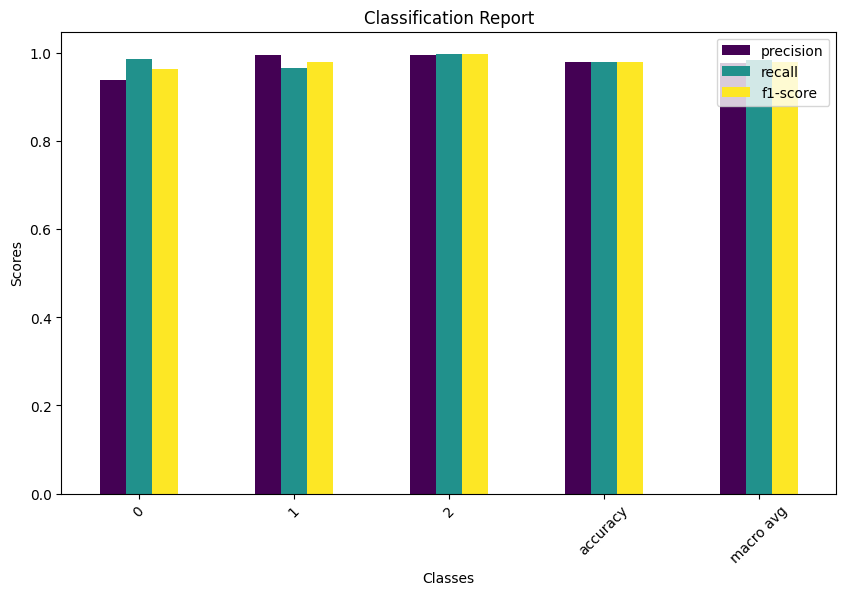

In [38]:
# Convert the dictionary to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot the precision, recall, and f1-score
report_df = report_df.iloc[:-1, :-1]  # Exclude support and accuracy row/column
report_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Classification Report")
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.show()

#### Accuracy Score

In [39]:
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9786657636302065


In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


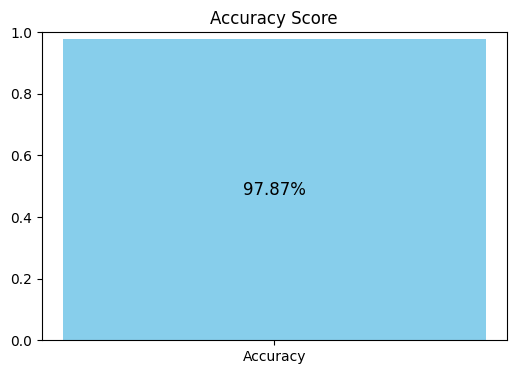

In [41]:
# Display accuracy in a plot
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy"], [accuracy], color="skyblue")
plt.ylim(0, 1)  # Scale from 0 to 1
plt.title("Accuracy Score")
plt.text(0, accuracy / 2, f"{accuracy:.2%}", ha="center", va="center", fontsize=12)
plt.show()

#### AUROC Curve

In [42]:
# Calculate AUROC
# Get predicted probabilities for all classes
y_pred_multi = model.predict_proba(X_test)

# Calculate AUROC for multi-class classification
auroc_multi = roc_auc_score(y_test, y_pred_multi, multi_class='ovr')
print(f"Area Under the ROC Curve (AUROC) for Multi-Class: {auroc_multi:.2f}")

Area Under the ROC Curve (AUROC) for Multi-Class: 1.00


# Interpret the Model

##### Logistic regression provides coefficients that indicate feature importance

In [43]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)

                  Feature  Coefficient
0  base_cumulative_return     2.083490
1        portfolio_return     1.165579
2      daily_sharpe_ratio     0.314153
3        number_of_trades     0.141990
4    unique_tokens_traded     0.137264


##### Save the model

In [44]:
#Save the Model
import pickle

model_file = 'logistic_regression_model.bin'
model_file

'logistic_regression_model.bin'

In [45]:
f_out = open(model_file, 'wb')
pickle.dump((scaler, model), f_out)
f_out.close()

In [46]:
# Save the trained model to a .bin file

with open(model_file, 'wb') as f_out:
    pickle.dump((scaler, model), f_out)

print(f"Model saved to {model_file}")

Model saved to logistic_regression_model.bin


#### Load the model from the Pickle File

In [52]:
import pickle

model_file = 'logistic_regression_model.bin'

# Load the model from the .bin file
with open(model_file, 'rb') as f_in:
    scaler, model = pickle.load(f_in)

print("Model loaded successfully!")

# Verify by predicting on the test set
y_pred_loaded = model.predict(X_test)

# Compare predictions from the original and loaded models
assert (y_pred == y_pred_loaded).all(), "Mismatch between original and loaded model predictions!"

print("Loaded model predictions match the original!")

Model loaded successfully!
Loaded model predictions match the original!


In [54]:
trader = [[ 
   -0.952871878, 
   19.799527694, 
   1.300632733, 
    36.0, 
    6.0 
    ]]



In [55]:
model.predict(trader)

array([2], dtype=int8)

##### After loading the model, let’s use it to score one sample customer.


In [48]:
trader = { 
    'user_address': '0x09dc02dfb7de2b150fe9a2d2ab92cf5767d423f9', 
    'base_cumulative_return': -0.952871878, 
    'portfolio_return': 19.799527694, 
    'daily_sharpe_ratio': 1.300632733, 
    'number_of_trades': 36.0, 
    'unique_tokens_traded': 6.0, 
    'trader_class_numeric': 1
    }

In [49]:
# Convert trader dictionary to a 2D array with the same feature order as during training
features = ['base_cumulative_return', 'portfolio_return', 
            'daily_sharpe_ratio', 'number_of_trades', 'unique_tokens_traded']

# Create a list of values in the correct order
trader_values = [[trader[feature] for feature in features]]
print(trader_values)
# Apply scaling
trader_scaled = scaler.transform(trader_values)

print(trader_scaled)

[[-0.952871878, 19.799527694, 1.300632733, 36.0, 6.0]]
[[-2.29738413 -1.92252927 -0.08323061  0.20852579  0.77878208]]


/Users/olaoluwatunmise/miniconda3/envs/web3ml/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
# Predict the class using the loaded model
prediction = model.predict(trader_scaled)

# Predict the probabilities for each class
prediction_prob = model.predict_proba(trader_scaled)

print(f"Predicted Class: {prediction[0]}")
print(f"Prediction Probabilities: {prediction_prob}")


Predicted Class: 1
Prediction Probabilities: [[6.19894293e-28 1.00000000e+00 5.23071445e-50]]


# Randomized Search for Hyperparameter Tuning

In [51]:
# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter distribution
# param_distributions = {
#     'C': np.logspace(-4, 4, 20),  # Exponential range for regularization
#     'solver': ['liblinear', 'lbfgs'],
#     'penalty': ['l1', 'l2'],
#     'max_iter': [100, 200, 300]
# }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=log_reg,
#     param_distributions=param_distributions,
#     n_iter=50,  # Number of parameter settings sampled
#     cv=5,
#     scoring='accuracy',
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # Fit the model to the training data
# random_search.fit(X_train, y_train)

# # Display best parameters and accuracy
# print("Best Parameters (Random Search):", random_search.best_params_)
# print(f"Best Cross-Validation Accuracy (Random Search): {random_search.best_score_:.2f}")

# # Use the best estimator for predictions
# best_model_random = random_search.best_estimator_
# y_pred_random = best_model_random.predict(X_test)

# # Evaluate the tuned model
# print("\nConfusion Matrix (Tuned Model - Random Search):")
# print(confusion_matrix(y_test, y_pred_random))
# print("\nClassification Report (Tuned Model - Random Search):")
# print(classification_report(y_test, y_pred_random))
# print(f"\nAccuracy (Tuned Model - Random Search): {accuracy_score(y_test, y_pred_random):.2f}")
